In [3]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.9.1'

# Load images

## To clone the repo with images

Run:
```shell
git clone git@github.com:alexeygrigorev/clothing-dataset-small.git
```

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
ls clothing-dataset-small/train/t-shirt | head

00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg
00805d0e-7fe5-4251-b577-86065e4f6587.jpg
00d9cc6e-2564-4813-9d68-4bc4d562107b.jpg
0144d8a2-0d3b-4bee-b137-324129e746a8.jpg
01ace8a7-7621-478e-af83-cd4fac4cb157.jpg
01d1fed7-996d-496b-b3ae-73ab724f29cc.jpg
0285f2a0-ff21-43de-9762-6454faa5eef8.jpg
02ef828a-a7d5-4475-bf44-3907b3a977ff.jpg
03103065-f445-44a5-b707-53b73534f57d.jpg
0373fc11-3fca-4b92-8ae5-e208d53135a0.jpg
ls: write error: Broken pipe


In [6]:
path = "clothing-dataset-small/train/t-shirt"
name = "f8c5b758-d78e-4182-8246-5bf94e0442d6.jpg"
fullname = f"{path}/{name}"

img = load_img(fullname, target_size=(299, 299))

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FA6904F2DF0>


In [8]:
img_np_array = np.array(img)
img_np_array.shape

(299, 299, 3)

# 8.3 Pre-trained CNNs

- Pre-trained models: https://keras.io/api/applications/

In [8]:
from tensorflow.keras.applications.xception import (
    Xception,
    decode_predictions,
    preprocess_input,
)

In [8]:
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3),
)

2023-11-17 09:49:00.782017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 09:49:00.789059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 09:49:00.789682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 09:49:00.790942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [11]:
X = np.array([img_np_array])
X = preprocess_input(X)

In [12]:
prediction = model.predict(X)

2023-11-17 05:54:29.733073: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-17 05:54:30.415417: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-17 05:54:30.415941: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-17 05:54:30.415988: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-17 05:54:30.416666: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-17 05:54:30.416768: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [13]:
np.argmax(prediction), prediction[0, np.argmax(prediction)]

(610, 0.86904454)

In [14]:
decode_predictions(prediction)

[[('n03595614', 'jersey', 0.86904454),
  ('n04370456', 'sweatshirt', 0.028514309),
  ('n02730930', 'apron', 0.0058672726),
  ('n02916936', 'bulletproof_vest', 0.0053358655),
  ('n04599235', 'wool', 0.0038015414)]]

# 8.5 Transfer learning

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train/", target_size=(150, 150), batch_size=32
)

Found 3068 images belonging to 10 classes.


In [11]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [12]:
!ls -l clothing-dataset-small/validation/

total 40
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 dress
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 hat
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 longsleeve
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 outwear
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 pants
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 shirt
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 shoes
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 shorts
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 skirt
drwxrwsr-x 2 jovyan jovyan 4096 Nov 16 14:24 t-shirt


In [13]:
X, y = next(train_ds)

Shape of one batch

In [14]:
X.shape

(32, 150, 150, 3)

y is one-hot encoded

In [15]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/validation/",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


## Create base model

In [17]:
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3),
)

base_model.trainable = False

### Investigate outputs of the base model

In [18]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

outputs = base

model = keras.Model(inputs, outputs)

Run the model on one batch of 32 images

In [19]:
preds = model.predict(X)

2023-11-17 09:49:28.365579: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-17 09:49:30.369229: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-17 09:49:30.369756: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-17 09:49:30.369797: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-17 09:49:30.370351: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-17 09:49:30.370447: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 5s 5s/step


In [20]:
preds.shape

(32, 5, 5, 2048)

The output of the base model is a 5 * 5 * 2048 (kinda 2048 5x5 images), not a 2048 vector that we'd like to have in the end before passing it to our own dense layers.
So before passing it downstream we need to make it a vector.
We can apply average pooling for instance

### Apply the pooling

In [21]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)

Run the model on one batch of 32 images

In [22]:
preds = model.predict(X)

1/1 [==============================] - 1s 941ms/step


In [23]:
preds.shape

(32, 2048)

Now we see that the output is what we want - 32 vectors of lenght 2048

### Finally add the Dense layer to get the 10-class classification predictions

In [56]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [58]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 0s 27ms/step


(32, 10)

In [61]:
preds[0]

array([-0.26659438, -0.75560004,  0.01556641, -1.4941046 , -1.4583678 ,
        0.04769646,  1.1236212 ,  0.30248362, -0.59568065, -1.451615  ],
      dtype=float32)

The output is random because the model isn't trained

### Train the model

In [65]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [66]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"],
)

In [67]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 16s 138ms/step - loss: 3.9399 - accuracy: 0.6017 - val_loss: 0.9601 - val_accuracy: 0.7390
Epoch 2/10
96/96 [==============================] - 12s 129ms/step - loss: 0.5490 - accuracy: 0.8188 - val_loss: 0.8883 - val_accuracy: 0.7595
Epoch 3/10
96/96 [==============================] - 12s 129ms/step - loss: 0.3842 - accuracy: 0.8667 - val_loss: 0.8554 - val_accuracy: 0.7713
Epoch 4/10
96/96 [==============================] - 12s 128ms/step - loss: 0.2434 - accuracy: 0.9117 - val_loss: 0.8471 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 12s 129ms/step - loss: 0.1574 - accuracy: 0.9413 - val_loss: 0.8155 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 12s 129ms/step - loss: 0.1045 - accuracy: 0.9632 - val_loss: 0.7436 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 12s 129ms/step - loss: 0.0696 - accuracy: 0.9804 - val_loss: 0.8331 - val_accuracy: 0.8094

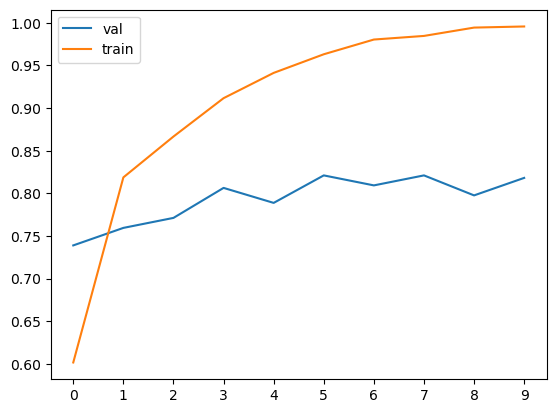

In [79]:
plt.plot(history.history["val_accuracy"], label="val")
plt.plot(history.history["accuracy"], label="train")
plt.xticks(range(10))
plt.legend();

In [6]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [25]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()
    

0.0001
Epoch 1/10
96/96 [==============================] - 17s 160ms/step - loss: 2.0169 - accuracy: 0.3295 - val_loss: 1.6099 - val_accuracy: 0.4839
Epoch 2/10
96/96 [==============================] - 11s 115ms/step - loss: 1.4201 - accuracy: 0.5583 - val_loss: 1.2374 - val_accuracy: 0.6158
Epoch 3/10
96/96 [==============================] - 11s 114ms/step - loss: 1.1589 - accuracy: 0.6415 - val_loss: 1.0518 - val_accuracy: 0.6657
Epoch 4/10
96/96 [==============================] - 11s 113ms/step - loss: 1.0134 - accuracy: 0.6796 - val_loss: 0.9373 - val_accuracy: 0.7273
Epoch 5/10
96/96 [==============================] - 11s 114ms/step - loss: 0.9174 - accuracy: 0.7089 - val_loss: 0.8625 - val_accuracy: 0.7478
Epoch 6/10
96/96 [==============================] - 11s 115ms/step - loss: 0.8486 - accuracy: 0.7321 - val_loss: 0.8124 - val_accuracy: 0.7654
Epoch 7/10
96/96 [==============================] - 11s 115ms/step - loss: 0.7960 - accuracy: 0.7422 - val_loss: 0.7743 - val_accuracy:

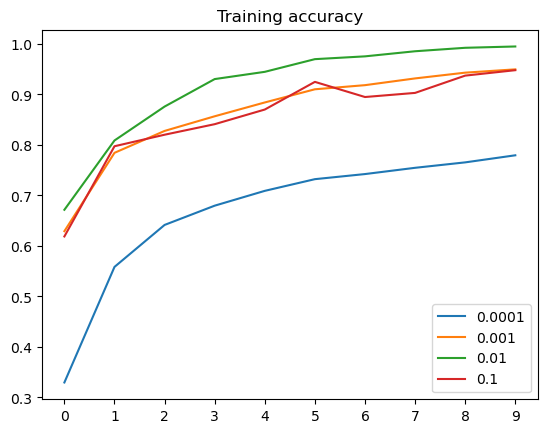

In [31]:
for lr, history in scores.items():
    plt.plot(history['accuracy'], label=lr)
    
plt.title('Training accuracy')
plt.xticks(range(10))
plt.legend();

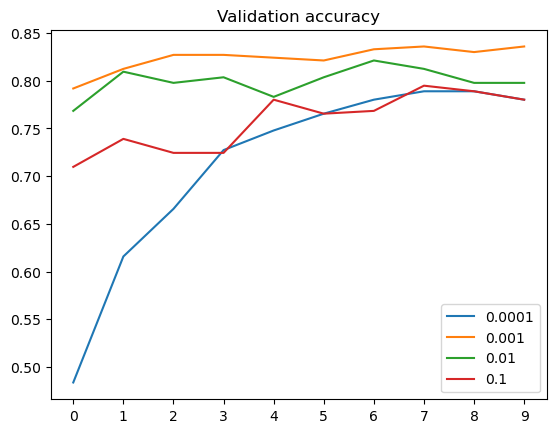

In [32]:
for lr, history in scores.items():
    plt.plot(history['val_accuracy'], label=lr)

    
plt.title('Validation accuracy')
plt.xticks(range(10))
plt.legend();

We see that the best rate is 0.001 (Adam's default one, surprise-surprise!)

# 8.7 Checkpointing 

In [5]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [14]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
96/96 [==============================] - 34s 339ms/step - loss: 1.0966 - accuracy: 0.6359 - val_loss: 0.6979 - val_accuracy: 0.7889
Epoch 2/10


/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 34s 353ms/step - loss: 0.6274 - accuracy: 0.7832 - val_loss: 0.6064 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 34s 349ms/step - loss: 0.5034 - accuracy: 0.8357 - val_loss: 0.5718 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 34s 357ms/step - loss: 0.4289 - accuracy: 0.8621 - val_loss: 0.5782 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 33s 345ms/step - loss: 0.3664 - accuracy: 0.8921 - val_loss: 0.5474 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 34s 354ms/step - loss: 0.3221 - accuracy: 0.9074 - val_loss: 0.5224 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 34s 356ms/step - loss: 0.2840 - accuracy: 0.9286 - val_loss: 0.5189 - val_accuracy: 0.8328
Epoch 8/10
96/96 [==============================] - 33s 343ms/step - loss: 0.2551 - accuracy: 0.9345 - val_loss: 0.5263 - val_accuracy: 0.8182
Epoch 9/10

# 8.8 Adding more layers

Add one inner layer and finetune its size

In [18]:
def make_model(learning_rate=0.001, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    # uncomment when running on saturn cloud
    # optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [19]:
scores = {}

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 35s 360ms/step - loss: 1.5734 - accuracy: 0.5010 - val_loss: 1.1394 - val_accuracy: 0.6334
Epoch 2/10
96/96 [==============================] - 34s 359ms/step - loss: 0.9984 - accuracy: 0.6897 - val_loss: 0.8698 - val_accuracy: 0.7361
Epoch 3/10
96/96 [==============================] - 35s 367ms/step - loss: 0.7822 - accuracy: 0.7432 - val_loss: 0.7724 - val_accuracy: 0.7537
Epoch 4/10
96/96 [==============================] - 33s 344ms/step - loss: 0.6650 - accuracy: 0.7823 - val_loss: 0.6968 - val_accuracy: 0.7742
Epoch 5/10
96/96 [==============================] - 36s 378ms/step - loss: 0.5794 - accuracy: 0.8070 - val_loss: 0.6750 - val_accuracy: 0.7801
Epoch 6/10
96/96 [==============================] - 34s 354ms/step - loss: 0.5134 - accuracy: 0.8341 - val_loss: 0.6501 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 33s 346ms/step - loss: 0.4674 - accuracy: 0.8514 - val_loss: 0.6305 - val_accuracy: 0.7

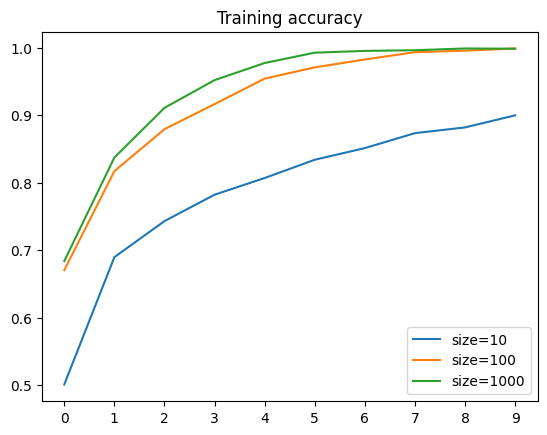

In [20]:
for size, history in scores.items():
    plt.plot(history['accuracy'], label=f'size={size}')
    
plt.title('Training accuracy')
plt.xticks(range(10))
plt.legend();

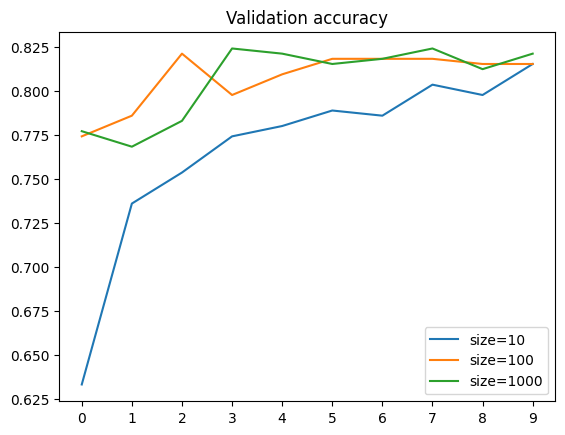

In [21]:
for size, history in scores.items():
    plt.plot(history['val_accuracy'], label=f'size={size}')

    
plt.title('Validation accuracy')
plt.xticks(range(10))
plt.legend();